In [109]:
#importing the necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import mutual_info_regression

In [ ]:
#Task 1: Exploratory Data Analysis (EDA)

In [43]:
#1.1. Perform a Thorough EDA

#open the dataset
df = pd.read_csv('marketing_campaign.csv')

#summary statistics
summary_statistics = df.describe()
print(summary_statistics)

#check for missing values
missing_values = df.isnull().sum()
print(missing_values)

df['Income'].fillna(df['Income'].median(), inplace=True)

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode categorical columns
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

# Convert date column to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Convert the date column to number of days since a reference date
df['Dt_Customer'] = (df['Dt_Customer'] - df['Dt_Customer'].min()).dt.days

# Encode the 'Response' column (0 = No, 1 = Yes)
df['Response'] = label_encoder.fit_transform(df['Response'])

print(df.dtypes)

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

C:\Users\motph\AppData\Local\Temp\ipykernel_42216\2153761311.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


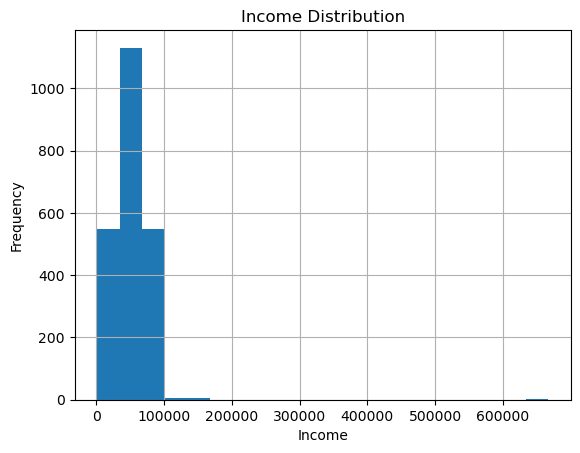

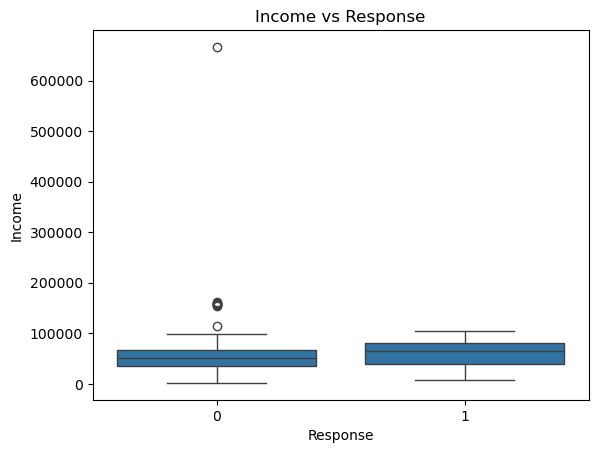

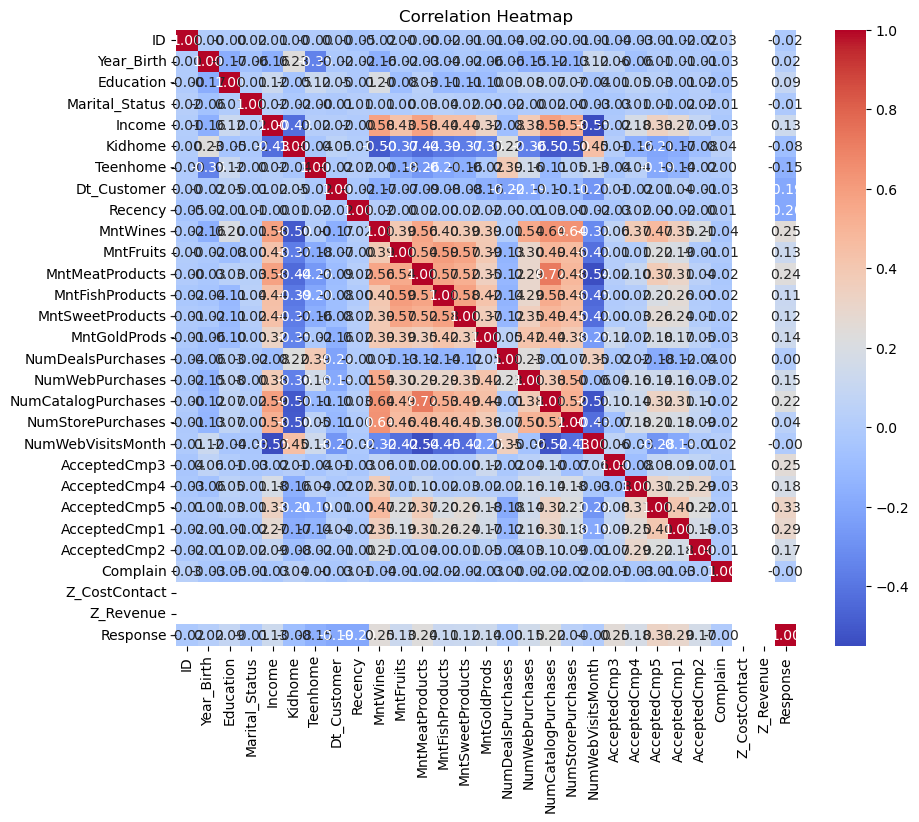

In [45]:
#1.2. Visualize the Dataset

df['Income'].hist(bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='Response', y='Income', data=df)
plt.title('Income vs Response')
plt.show()

# Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


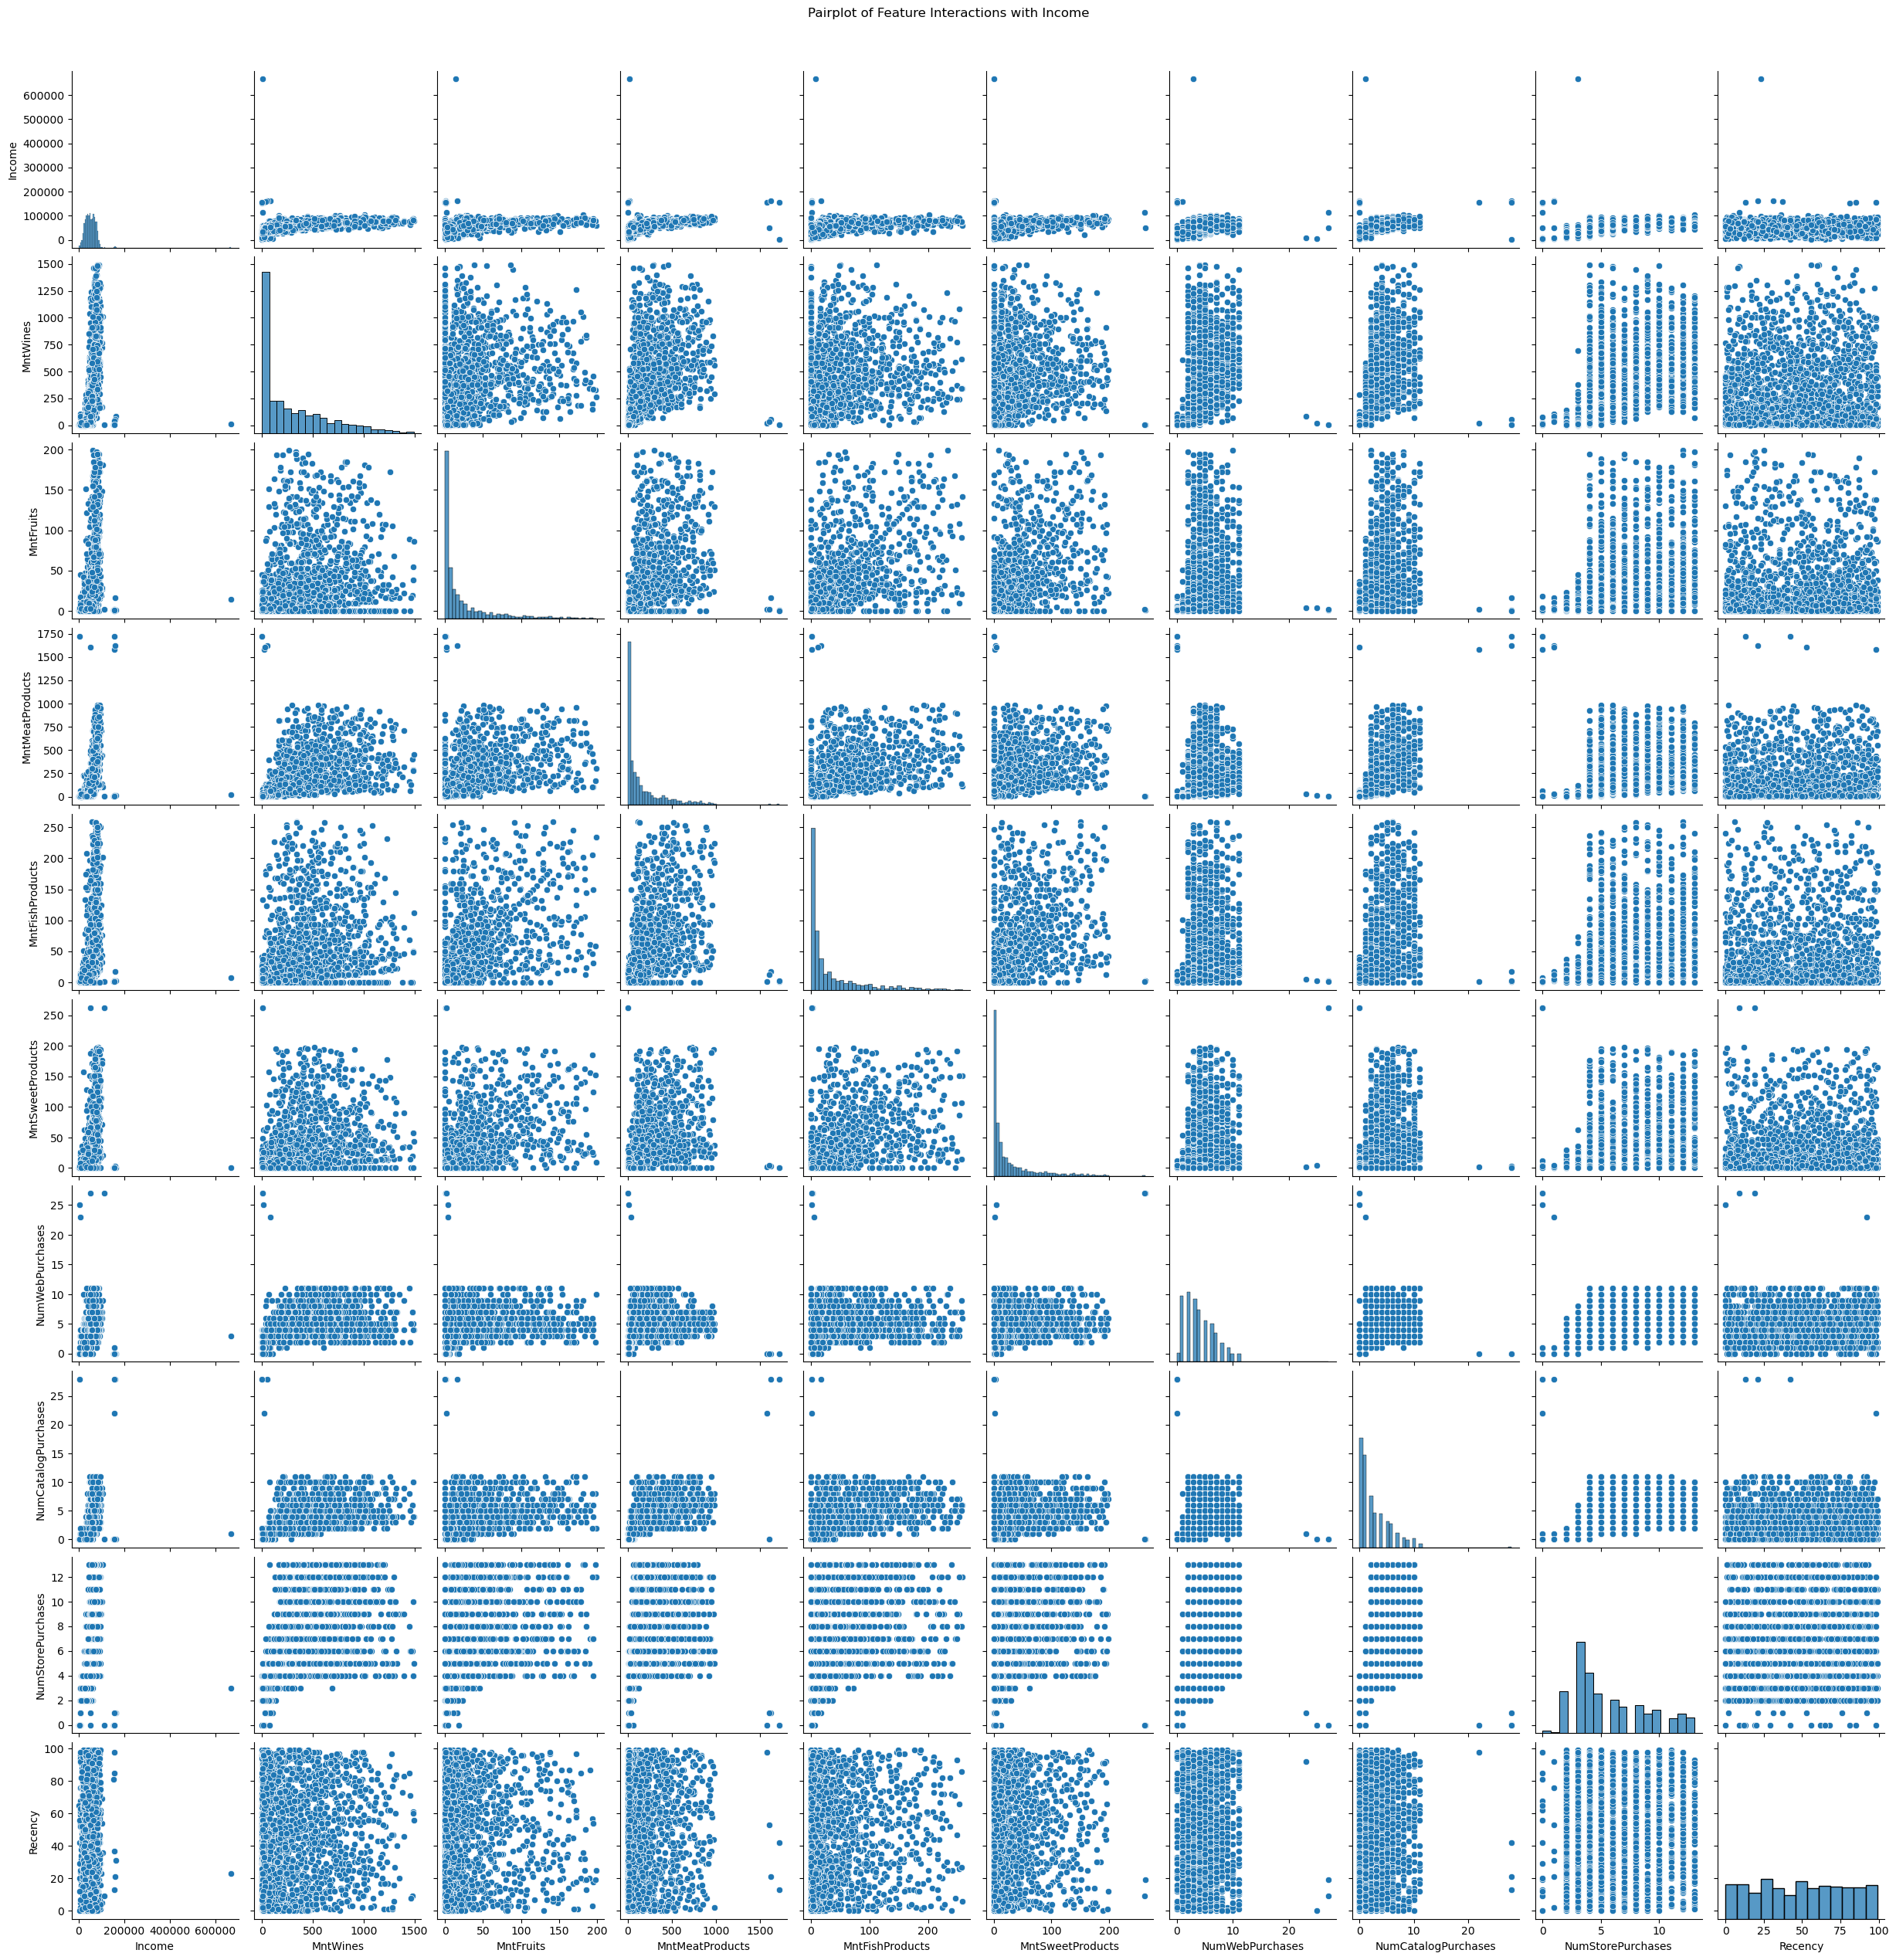

In [49]:
#1.3. Generate pairplots to analyze feature interactions and their impact on Income.

# Select the relevant columns for the pairplot
selected_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                    'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases', 
                    'NumStorePurchases', 'Recency']

# Subset the DataFrame to only include selected columns
df_subset = df[selected_columns]

# Generate the pairplot to analyze feature interactions with 'Income'
sns.pairplot(df_subset)
plt.suptitle("Pairplot of Feature Interactions with Income", y=1.02)
plt.show()


In [ ]:
#Task 2: Regression Analysis

In [81]:
#1. Linear Regression

# Select the features to predict Income
X = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']]
y = df['Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression - R-squared: {r2:.4f}")
print(f"Linear Regression - RMSE: {rmse:.4f}")


Linear Regression - R-squared: 0.6457
Linear Regression - RMSE: 12287.1435


In [83]:
#2. Kernel Regression

# Define kernels to test
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    # Initialize and train the Kernel Ridge Regression model with the specified kernel
    kernel_reg = KernelRidge(kernel=kernel)
    kernel_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred_kernel = kernel_reg.predict(X_test)
    
    # Calculate R-squared and RMSE
    r2_kernel = r2_score(y_test, y_pred_kernel)
    rmse_kernel = np.sqrt(mean_squared_error(y_test, y_pred_kernel))
    
    print(f"Kernel Regression ({kernel} kernel) - R-squared: {r2_kernel:.4f}")
    print(f"Kernel Regression ({kernel} kernel) - RMSE: {rmse_kernel:.4f}")


Kernel Regression (linear kernel) - R-squared: 0.3335
Kernel Regression (linear kernel) - RMSE: 16853.5528


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Kernel Regression (poly kernel) - R-squared: 0.3311
Kernel Regression (poly kernel) - RMSE: 16883.6902
Kernel Regression (rbf kernel) - R-squared: -5.6572
Kernel Regression (rbf kernel) - RMSE: 53264.6869


In [84]:
#3. Ridge Regression

# Initialize Ridge regression model
ridge_reg = Ridge()

# Define a range of alpha values for tuning
alpha_values = np.logspace(-6, 6, 13)
param_grid = {'alpha': alpha_values}

# Use GridSearchCV to find the best alpha value
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha for Ridge Regression: {best_alpha:.6f}")

# Train the Ridge model with the best alpha
ridge_reg_best = Ridge(alpha=best_alpha)
ridge_reg_best.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_reg_best.predict(X_test)

# Calculate R-squared and RMSE
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Ridge Regression - R-squared: {r2_ridge:.4f}")
print(f"Ridge Regression - RMSE: {rmse_ridge:.4f}")


Best alpha for Ridge Regression: 1000.000000
Ridge Regression - R-squared: 0.6463
Ridge Regression - RMSE: 12277.0069


In [86]:
#4. Lasso Regression

# Initialize Lasso regression model
lasso_reg = Lasso()

# Use GridSearchCV to tune the alpha parameter for Lasso
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Get the best alpha value
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print(f"Best alpha for Lasso Regression: {best_alpha_lasso:.6f}")

# Train the Lasso model with the best alpha
lasso_reg_best = Lasso(alpha=best_alpha_lasso)
lasso_reg_best.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_reg_best.predict(X_test)

# Calculate R-squared and RMSE
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso Regression - R-squared: {r2_lasso:.4f}")
print(f"Lasso Regression - RMSE: {rmse_lasso:.4f}")

# Analyze the features retained after regularization
non_zero_features = np.where(lasso_reg_best.coef_ != 0)[0]
print("Features retained by Lasso Regression:", X.columns[non_zero_features].tolist())


Best alpha for Lasso Regression: 10.000000
Lasso Regression - R-squared: 0.6458
Lasso Regression - RMSE: 12286.6907
Features retained by Lasso Regression: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']


In [89]:
#5. Logistic Regression

# Select the features to predict Response
X_response = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']]
y_response = df['Response']

# Split the data into training and testing sets
X_train_resp, X_test_resp, y_train_resp, y_test_resp = train_test_split(X_response, y_response, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resp, y_train_resp)

# Make predictions
y_pred_resp = log_reg.predict(X_test_resp)

# Evaluate the model
accuracy = accuracy_score(y_test_resp, y_pred_resp)
precision = precision_score(y_test_resp, y_pred_resp)
recall = recall_score(y_test_resp, y_pred_resp)
f1 = f1_score(y_test_resp, y_pred_resp)

print(f"Logistic Regression - Accuracy: {accuracy:.4f}")
print(f"Logistic Regression - Precision: {precision:.4f}")
print(f"Logistic Regression - Recall: {recall:.4f}")
print(f"Logistic Regression - F1-score: {f1:.4f}")


Logistic Regression - Accuracy: 0.8594
Logistic Regression - Precision: 0.6667
Logistic Regression - Recall: 0.1739
Logistic Regression - F1-score: 0.2759


In [ ]:
#Task 3: Clustering Analysis

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


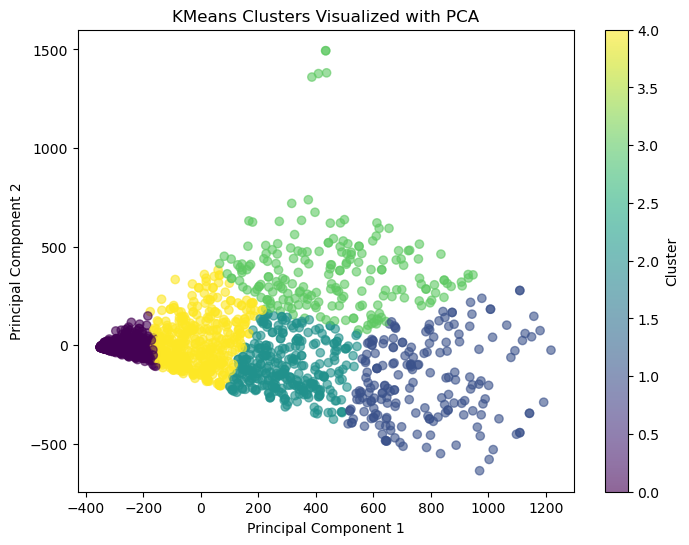

In [93]:
#KMeans Clustering

# Select features related to spending behavior
spending_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                     'MntSweetProducts']

# Subset the data to the spending behavior features
X_spending = df[spending_features]

# Apply KMeans clustering (5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_spending)

# Assign cluster labels to each customer
df['KMeans_Cluster'] = kmeans.labels_

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_spending)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


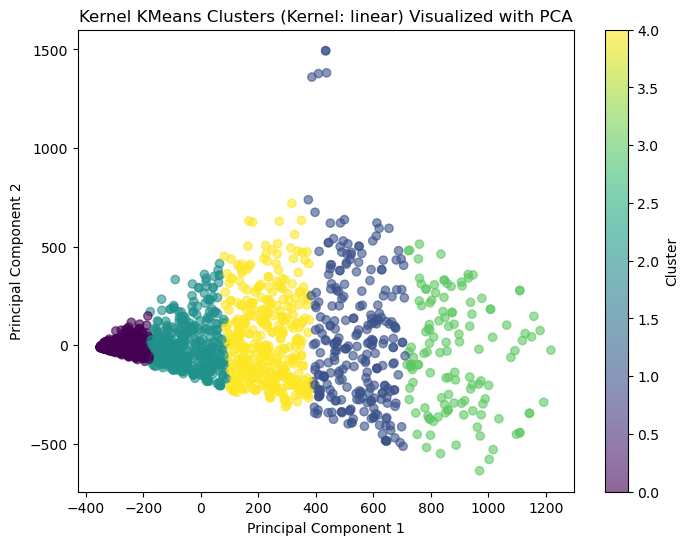

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


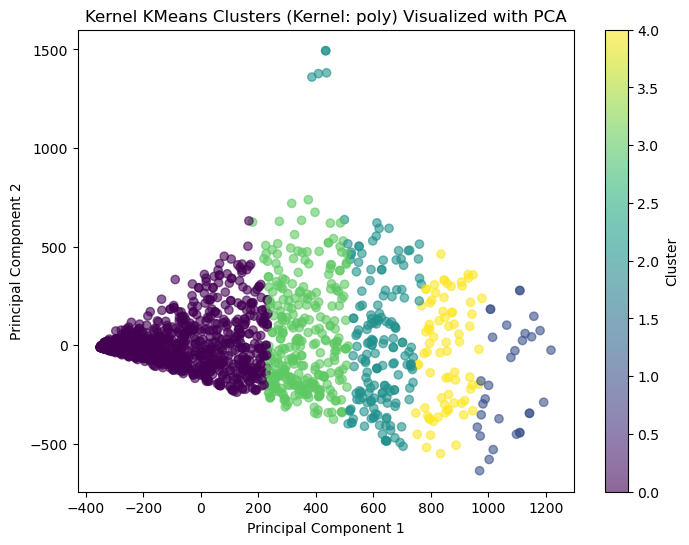

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


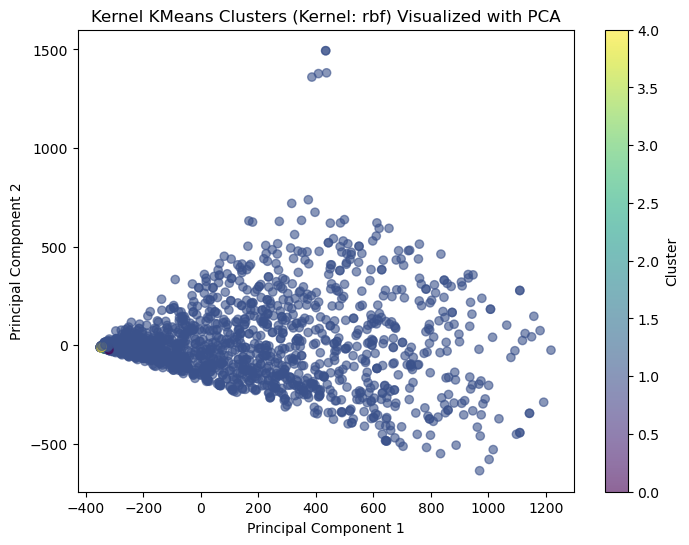

In [95]:
#Kernel KMeans Clustering

# Apply Kernel KMeans with different kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    # Compute kernel matrix based on the selected kernel
    if kernel == 'linear':
        kernel_matrix = linear_kernel(X_spending)
    elif kernel == 'poly':
        kernel_matrix = polynomial_kernel(X_spending, degree=3)
    elif kernel == 'rbf':
        kernel_matrix = rbf_kernel(X_spending, gamma=0.1)
    
    # Fit KMeans on the kernel matrix
    kernel_kmeans = KMeans(n_clusters=5, random_state=42)
    kernel_kmeans.fit(kernel_matrix)
    
    # Assign cluster labels to each customer
    df[f'KernelKMeans_Cluster_{kernel}'] = kernel_kmeans.labels_
    
    # Perform PCA to reduce the data to 2 dimensions for visualization
    X_pca_kernel = pca.fit_transform(X_spending)
    
    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca_kernel[:, 0], X_pca_kernel[:, 1], c=df[f'KernelKMeans_Cluster_{kernel}'], cmap='viridis', alpha=0.6)
    plt.title(f'Kernel KMeans Clusters (Kernel: {kernel}) Visualized with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


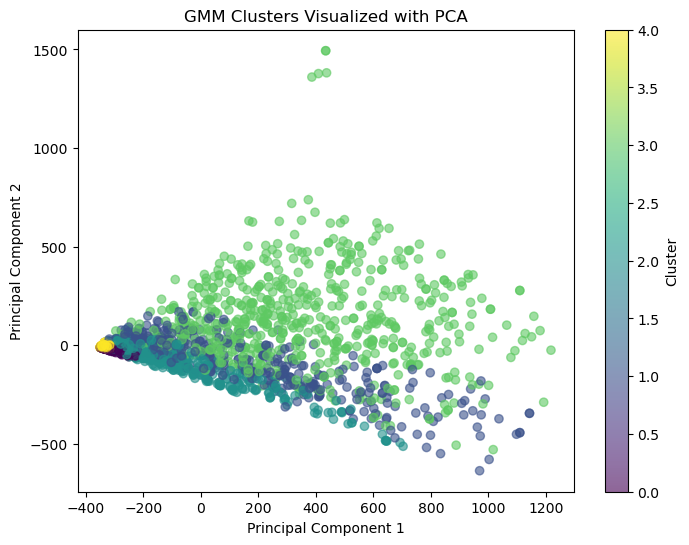

In [99]:
#Expectation Maximization (GMM)

# Fit a Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_spending)

# Assign cluster labels to each customer
df['GMM_Cluster'] = gmm.predict(X_spending)

# Perform PCA to reduce the data to 2 dimensions for visualization
X_pca_gmm = pca.fit_transform(X_spending)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_gmm[:, 0], X_pca_gmm[:, 1], c=df['GMM_Cluster'], cmap='viridis', alpha=0.6)
plt.title('GMM Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [101]:
#Task 4: Feature Selection

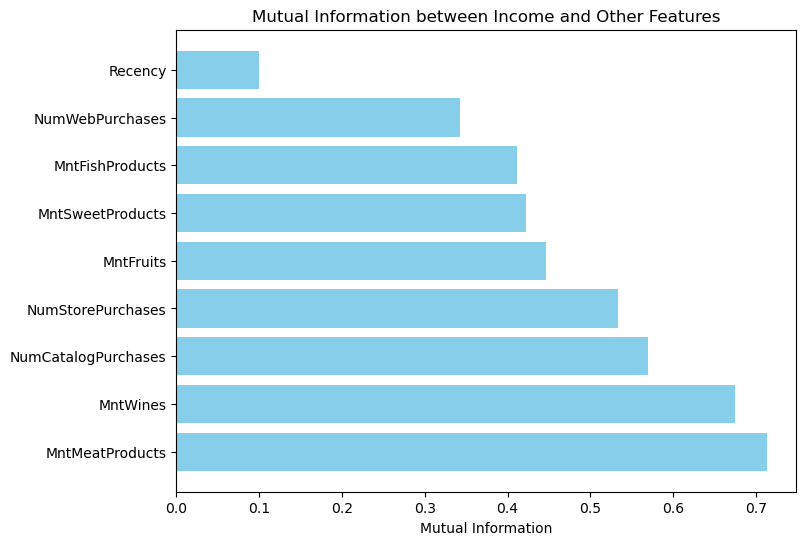

,Feature,Mutual Information
2,MntMeatProducts,0.713146
0,MntWines,0.674738
6,NumCatalogPurchases,0.570156
7,NumStorePurchases,0.533341
1,MntFruits,0.446279
4,MntSweetProducts,0.422559
3,MntFishProducts,0.411121
5,NumWebPurchases,0.342135
8,Recency,0.099493


In [105]:
#1. Mutual Information

# Select relevant features for mutual information (numerical columns)
numerical_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                      'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases', 
                      'NumStorePurchases', 'Recency']

# Compute mutual information between 'Income' and the numerical features
X = df[numerical_features]
y = df['Income']
mutual_info = mutual_info_regression(X, y)

# Create a DataFrame to store the mutual information values
mutual_info_df = pd.DataFrame({'Feature': numerical_features, 'Mutual Information': mutual_info})

# Sort the features by mutual information in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Visualize the mutual information values
plt.figure(figsize=(8, 6))
plt.barh(mutual_info_df['Feature'], mutual_info_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information between Income and Other Features')
plt.show()

# Display mutual information values
mutual_info_df


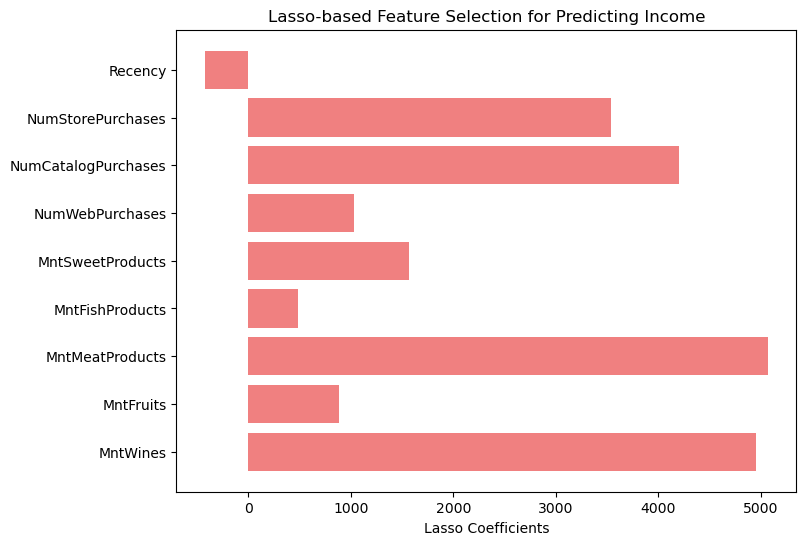

MntWines               4953.271461
MntFruits               882.652118
MntMeatProducts        5072.889597
MntFishProducts         482.782269
MntSweetProducts       1565.518864
NumWebPurchases        1026.483567
NumCatalogPurchases    4198.822140
NumStorePurchases      3542.382421
Recency                -427.634819
dtype: float64

In [107]:
#2. Lasso-based Feature Selection

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Lasso regression model
lasso = Lasso(alpha=0.01)  # You can tune the alpha parameter for regularization strength
lasso.fit(X_scaled, y)

# Get the non-zero coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=numerical_features)

# Select features with non-zero coefficients
selected_features = lasso_coefficients[lasso_coefficients != 0]

# Visualize the Lasso coefficients
plt.figure(figsize=(8, 6))
plt.barh(selected_features.index, selected_features.values, color='lightcoral')
plt.xlabel('Lasso Coefficients')
plt.title('Lasso-based Feature Selection for Predicting Income')
plt.show()

# Display selected features with non-zero coefficients
selected_features


In [ ]:
#Task 5: PCA with Regression

In [111]:
#1. Apply PCA to reduce dimensionality of the dataset.

# Select features for PCA (excluding 'Income' as it's the target)
X = df[numerical_features]
y = df['Income']

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (we'll use 5 components as an example)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio (for understanding how much variance each component explains)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio of top 5 principal components:", explained_variance_ratio)


Explained Variance Ratio of top 5 principal components: [0.49352095 0.11394259 0.11101536 0.07753619 0.05247149]


In [115]:
#2. Use the top principal components as features for regression.

# Train a Linear Regression model using the original features
lr_original = LinearRegression()
lr_original.fit(X_scaled, y)

# Predict on the training data
y_pred_original = lr_original.predict(X_scaled)

# Calculate performance metrics (R-squared and RMSE)
r2_original = r2_score(y, y_pred_original)
rmse_original = mean_squared_error(y, y_pred_original, squared=False)

print("Performance of Linear Regression on Original Features:")
print(f"R-squared: {r2_original:.4f}")
print(f"RMSE: {rmse_original:.4f}")

# Train a Linear Regression model using the principal components from PCA
lr_pca = LinearRegression()
lr_pca.fit(X_pca, y)

# Predict on the training data
y_pred_pca = lr_pca.predict(X_pca)

# Calculate performance metrics (R-squared and RMSE)
r2_pca = r2_score(y, y_pred_pca)
rmse_pca = mean_squared_error(y, y_pred_pca, squared=False)

print("Performance of Linear Regression on Principal Components:")
print(f"R-squared: {r2_pca:.4f}")
print(f"RMSE: {rmse_pca:.4f}")


Performance of Linear Regression on Original Features:
R-squared: 0.4707
RMSE: 18211.6450
Performance of Linear Regression on Principal Components:
R-squared: 0.4687
RMSE: 18245.8928


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [117]:
#3. Compare the performance of regression before and after PCA.

print("\nPerformance Comparison:")
print(f"Original Features - R-squared: {r2_original:.4f}, RMSE: {rmse_original:.4f}")
print(f"Principal Components - R-squared: {r2_pca:.4f}, RMSE: {rmse_pca:.4f}")



Performance Comparison:
Original Features - R-squared: 0.4707, RMSE: 18211.6450
Principal Components - R-squared: 0.4687, RMSE: 18245.8928
